# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Logistic Regression`.


## Instructions
- Do not Use Direct Inbuilt functions for the Task.
- Numpy or other math libraries are allowed.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not change the contents of the Given cells. Use new cells to Write your code.


## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q3.ipynb`
- Fill the Name and Roll number in the below markdown

Name: Tushar Jain<br>
Roll Number: 2019101091

### Dataset

Use the code below to load the Dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

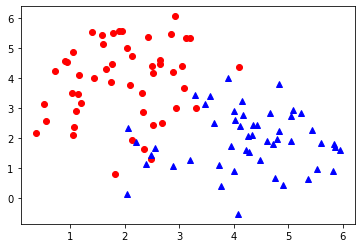

In [3]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')


Write your code below for logistic regression with Gradient Descent and plot the decision boundary.<br>
Sample output is given in the file `LogisticRegression_sample_result.png`

In [1]:
class Logistic_Regression:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.b = np.array([0, 0, 0], dtype = float)
        self.epochs = 10000
        self.learnRate = 0.001

    def predict(self,point):
        point = np.append(point, 1)
        final = 1/(1+ math.exp(-(np.transpose(np.array(self.b)).dot(np.array(point)))))
        return final

    def Gd_step(self):
        y_pred = []
        for i in range(0,len(self.X)):
            y_pred.append(self.predict(self.X[i]))
        len_X = len(self.X)
        final = np.append(((1/len_X)*np.dot(self.X.T, (y_pred - self.y))), (1/len_X)*np.sum((y_pred - self.y)))
        return final
    
    def GD(self):
        for i in range(self.epochs):
            Db= self.Gd_step()
            self.b = self.b - self.learnRate*Db
        

In [5]:
Regressor = Logistic_Regression(X,y)
Regressor.GD()


Text(0, 0.5, 'Feature 2')

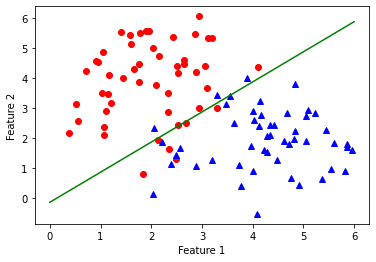

In [6]:
b = Regressor.b
x_line = np.linspace(0, 6, 1000)
y_line = [ (-1*i*(b[0]/b[1]) + b[2]) for i in x_line ]

plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')
plt.plot(x_line, y_line, color = "green")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

### Questions

1) Explain the approach of Logistic Regression.<br>
2) What is the loss function used?<br>
3) Explain if we can use Mean Square Error(MSE) as Loss function.

**1) Explain the approach of Logistic Regression.**

In this method, we do binary classification by drawing a linear boundary that seperates the two classes. This linear boundary is found by optimising a loss function. In the above code we have use gradient descent to optimise the loss function.

**2) What is the loss function used?**

Log loss is the name of the loss function used in logistic regression.

**3) Explain if we can use Mean Square Error(MSE) as Loss function.**

No, we cannot use MSE here, as it is non-convex.